<a href="https://colab.research.google.com/github/Yogi-Puvvala/Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, r2_score, accuracy_score, f1_score

In [44]:
df = pd.read_csv("sample_data/train.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Cleaning**

In [46]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
df["Cabin"].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [48]:
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [49]:
fill = df["Embarked"].mode()[0]
df["Embarked"].fillna(fill, inplace=True)
df["Embarked"].isna().sum()

/tmp/ipython-input-49-1606068499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(fill, inplace=True)


np.int64(0)

In [50]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
df.drop(["Name"], inplace= True, axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
def convert(x):
    if x.split()[-1].isnumeric():
        return int(x.split()[-1])
    else:
        return np.nan

In [53]:
df["Ticket"] = df["Ticket"].apply(lambda x: convert(x))

In [54]:
df["Ticket"].fillna(df["Ticket"].mode()[0], inplace= True)

/tmp/ipython-input-54-2959814447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ticket"].fillna(df["Ticket"].mode()[0], inplace= True)


In [55]:
df["Ticket"].isna().sum()

np.int64(0)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,21171.0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,17599.0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,3101282.0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803.0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450.0,8.0500,NaN,S


In [57]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [58]:
df["Cabin"].fillna(df["Cabin"].mode()[0], inplace= True)

/tmp/ipython-input-58-1052705276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna(df["Cabin"].mode()[0], inplace= True)


In [59]:
df["Age"].fillna(round(df["Age"].mean()), inplace= True)

/tmp/ipython-input-59-1791314569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(round(df["Age"].mean()), inplace= True)


In [60]:
df.isna().sum().sum()

np.int64(0)

In [61]:
df["Sex"].replace({"male": 1, "female": 0}, inplace= True)
df["Sex"].head()

/tmp/ipython-input-61-2561124208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({"male": 1, "female": 0}, inplace= True)
/tmp/ipython-input-61-2561124208.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace({"male": 1, "female": 0}, inplace= True)


,Sex
0,1
1,0
2,0
3,0
4,1


In [62]:
df.drop(["Cabin"], axis=1, inplace= True)

In [63]:
df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace= True)

/tmp/ipython-input-63-3008759092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace= True)
/tmp/ipython-input-63-3008759092.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace= True)


# **EDA**

In [64]:
top_corr = df.corr()["Survived"].sort_values(ascending= False)
top_corr

,Survived
Survived,1.000000
Fare,0.257307
Embarked,0.106811
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.070657
Ticket,-0.095609
Pclass,-0.338481
Sex,-0.543351


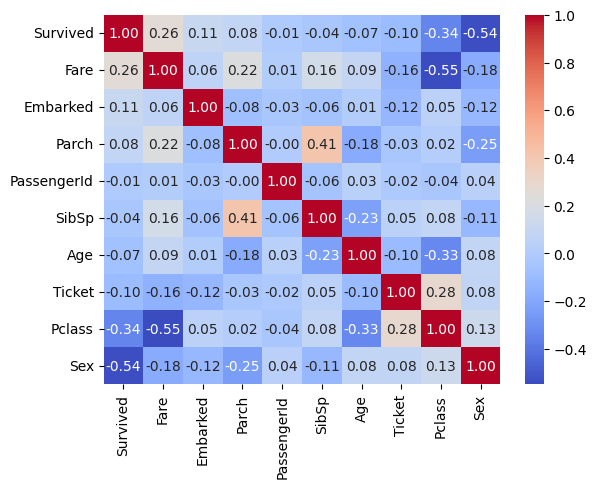

In [65]:
sns.heatmap(df[top_corr.index].corr(), cmap="coolwarm", annot= True, fmt= ".2f")

plt.show()

## **Conclusion**: The Survived rate is mostly correlated with the Fare and Embarked attributes

In [66]:
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter= 10000))
])

In [69]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000))])

In [70]:
log_pred = log_reg.predict(X_test)

In [71]:
print("Training Score:", log_reg.score(X_train, y_train))
print("Testing Score:", log_reg.score(X_test, y_test))

Training Score: 0.7935393258426966
Testing Score: 0.8044692737430168


In [72]:
print("Classification Report:", classification_report(y_test, log_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.74      0.77      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [73]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))
print("Actual Iterations used: ", log_reg.n_features_in_)

Accuracy: 0.8044692737430168
F1 Score: 0.75177304964539
Actual Iterations used:  9
